# Diet Classification - Part 2

Part 2 consist of the EDA of the vegan and keto datasets. For data extraction, it will be available in Part 1 and preprocessing and modelling will be available in Part 3. 

## Content

- [Data Dictionary](#Data-Dictionary)
- [Data Import](#1.0-Data-Import)
- [Data Cleaning](#2.0-Data-Cleaning)
- [EDA on Datasets](#3.0-EDA-on-Datasets)
- [Preliminary Review](#4.0-Preliminary-Review)
- [Export Combined Datasets](#Export-Combined-Dataset)

## Data Dictionary 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|author|object|vegan & keto|Author of the subreddit post| 
|link_flair_text|object|vegan & keto|Tagging of the subreddit post| 
|num_comments|int|vegan & keto|Total comments on subreddit post| 
|subreddit_subscribers|int|vegan & keto|Total subscribers of the subreddit at the point of the post| 
|subreddit|object|vegan & keto|Subreddit| 
|text|object|vegan & keto|Combined test from title and selftext| 
|post_datetime|datetime|vegan & keto|Date and Time of the subreddit post| 
|date|datetime|combined_df|Date of the subreddit post| 
|hour|datetime|combined_df|Hour of the subreddit post| 
|day|datetime|combined_df|Day of the month of subreddit post| 
|text_word_count|int|combined_df|Text word count of subreddit post| 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## 1.0 Data Import

In [2]:
vegan = pd.read_csv('../data/vegan.csv', low_memory=False)
pd.set_option('display.max_column', 100)

vegan.head(5)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,removed_by_category,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,treatment_tags,upvote_ratio,url,url_overridden_by_dest,whitelist_status,wls,is_gallery,media,media_embed,secure_media,secure_media_embed,crosspost_parent,crosspost_parent_list,author_flair_background_color,banned_by,poll_data,media_metadata,author_cakeday,distinguished,edited,gallery_data,gilded
0,[],False,Elise_93,NaN,[],349bd530-7bcd-11e9-9a04-0ee954ab499e,vegan 8+ years,dark,text,t2_224i01sh,False,False,[],False,False,1618711390,i.redd.it,https://www.reddit.com/r/vegan/comments/mt3zoq...,{},mt3zoq,False,False,False,True,False,False,False,NaN,Funny,[],4983f5d2-e206-11e4-9f95-22000bb2c21d,Funny,dark,text,False,False,True,0,0,False,all_ads,/r/vegan/comments/mt3zoq/a_summary_of_carnist_...,False,image,"{'enabled': True, 'images': [{'id': 'De33IZ6ef...",6,automod_filtered,1618711401,1,NaN,True,False,False,vegan,t5_2qhpm,590954,public,https://b.thumbs.redditmedia.com/cTOm6m5yfgut1...,15.0,140.0,A summary of carnist logic about PETA:,0,[],1.0,https://i.redd.it/hezjrlks9ut61.png,https://i.redd.it/hezjrlks9ut61.png,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,SeviathanVonEldritch,NaN,[],70cd74e0-f01f-11e2-be4e-12313d05241f,vegan,dark,text,t2_b1twfs3g,False,False,[],False,False,1618711076,i.redd.it,https://www.reddit.com/r/vegan/comments/mt3wse...,{},mt3wse,False,False,False,True,False,False,False,NaN,Rant,[],93c0fe64-689e-11e5-b5be-0e7eccdaeabd,Rant,dark,text,False,False,True,0,0,False,all_ads,/r/vegan/comments/mt3wse/underestimated_it_as_...,False,image,"{'enabled': True, 'images': [{'id': 'yoc4iZ2JI...",6,automod_filtered,1618711086,1,NaN,True,False,False,vegan,t5_2qhpm,590952,public,https://b.thumbs.redditmedia.com/exsHq-ceI36Vq...,94.0,140.0,Underestimated it as well...,0,[],1.0,https://i.redd.it/15kexfke9ut61.png,https://i.redd.it/15kexfke9ut61.png,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,quidiuris,NaN,[],NaN,NaN,NaN,text,t2_2n3ymh1l,False,False,[],False,False,1618710905,self.vegan,https://www.reddit.com/r/vegan/comments/mt3vde...,{},mt3vde,False,False,False,False,False,True,False,NaN,NaN,[],NaN,NaN,dark,text,False,False,True,0,0,False,all_ads,/r/vegan/comments/mt3vde/hair_conditioner_bars...,False,NaN,NaN,6,automod_filtered,1618710916,1,[removed],True,False,False,vegan,t5_2qhpm,590952,public,self,NaN,NaN,Hair conditioner bars - any recommendations?,0,[],1.0,https://www.reddit.com/r/vegan/comments/mt3vde...,NaN,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,lunanabiki,NaN,[],NaN,NaN,NaN,text,t2_bjhroi5v,False,False,[],False,False,1618710671,self.vegan,https://www.reddit.com/r/vegan/comments/mt3tar...,{},mt3tar,False,False,False,False,False,True,False,NaN,NaN,[],NaN,NaN,dark,text,False,False,True,0,0,False,all_ads,/r/vegan/comments/mt3tar/nonvegan_logic_that_s...,False,NaN,NaN,6,automod_filtered,1618710682,1,[removed],True,False,False,vegan,t5_2qhpm,590953,public,self,NaN,NaN,nonvegan logic that surprises me (that i haven...,0,[],1.0,https://www.reddit.com/r/vegan/comments/mt3tar...,NaN,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
keto = pd.read_csv('../data/keto.csv', low_memory=False)
pd.set_option('display.max_column', 100)
keto.sample(5)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,removed_by_category,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,author_flair_background_color,author_flair_text_color,author_flair_template_id,author_cakeday,crosspost_parent,crosspost_parent_list,url_overridden_by_dest,banned_by,edited,gilded,thumbnail_height,thumbnail_width,distinguished
2058,[],False,Valerio-Monge,NaN,[],NaN,text,t2_4r3ph6mv,False,False,[],False,False,1615396420,self.keto,https://www.reddit.com/r/keto/comments/m22ls3/...,{},m22ls3,True,False,False,False,True,True,False,NaN,SOS,"[{'e': 'text', 't': 'Help'}]",715fe9ae-abe7-11e8-8938-0ef2dfd48a7e,Help,dark,richtext,False,False,True,1,0,False,all_ads,/r/keto/comments/m22ls3/i_got_out_of_ketosis_a...,False,NaN,NaN,6,NaN,1615396431,1,"Hello, i have a question, \nI don't know if i ...",True,False,False,keto,t5_2rske,2331412,public,self,I got out of ketosis and now?,0,[],1.0,https://www.reddit.com/r/keto/comments/m22ls3/...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8824,[],False,poly_nerd,NaN,[],NaN,text,t2_97v2vgrh,False,False,[],False,False,1607905617,self.keto,https://www.reddit.com/r/keto/comments/kcmik5/...,{},kcmik5,False,False,False,False,False,True,False,NaN,NaN,[],NaN,NaN,dark,text,True,False,True,5,0,False,all_ads,/r/keto/comments/kcmik5/vegetarian_keto_is_it_...,False,NaN,NaN,6,automod_filtered,1607905628,1,[removed],True,False,False,keto,t5_2rske,2193342,public,self,Vegetarian Keto- is it possible?,0,[],1.0,https://www.reddit.com/r/keto/comments/kcmik5/...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3080,[],False,justanewname0,NaN,[],NaN,text,t2_95kk8ul9,False,False,[],False,False,1614015905,self.keto,https://www.reddit.com/r/keto/comments/lpuq6n/...,{},lpuq6n,False,False,False,False,False,True,False,NaN,NaN,[],NaN,NaN,dark,text,False,False,True,0,0,False,all_ads,/r/keto/comments/lpuq6n/discord_chat/,False,NaN,NaN,6,moderator,1614015915,1,[removed],True,False,False,keto,t5_2rske,2313902,public,self,Discord chat?,0,[],1.0,https://www.reddit.com/r/keto/comments/lpuq6n/...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9533,[],False,laughpuppy23,NaN,[],NaN,text,t2_1o19se47,False,False,[],False,False,1606919540,self.keto,https://www.reddit.com/r/keto/comments/k5a94e/...,{},k5a94e,True,False,False,False,True,True,False,NaN,TNT,"[{'e': 'text', 't': 'Tips and Tricks'}]",2c0c329e-abe8-11e8-a749-0ea6409e913c,Tips and Tricks,dark,richtext,False,False,True,5,0,False,all_ads,/r/keto/comments/k5a94e/psa_no_salt_potassium_...,False,NaN,NaN,6,NaN,1606919552,1,"On the way back home from vacation, My mom jus...",True,False,False,keto,t5_2rske,2177561,public,self,PSA: no salt (potassium salt) will make alarms...,0,[],1.0,https://www.reddit.com/r/keto/comments/k5a94e/...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8253,[],False,OMGimsoawesome,NaN,[],NaN,text,t2_9cg56,False,False,[],False,False,1608641203,self.keto,https://www.reddit.com/r/keto/comments/ki4p1w/...,{},ki4p1w,True,False,False,False,True,True,False,NaN,NaN,[],NaN,NaN,dark,text,False,False,True,7,0,False,all_ads,/r/keto/comments/ki4p1w/its_either_my_scale_is...,False,NaN,NaN,6,NaN,1608641213,1,Last Sunday I was at the doctors office in the...,True,False,False,ke

## 2.0 Data Cleaning

Data collected will be reviewed on its relationship to the subreddit. We will observe the author postings, the title and text, the type of post in each reddits as well as any timeline behaviour for keto community that may differ to vegan community. 

In [4]:
#check and select required columns
vegan = vegan[['author','title','selftext','link_flair_text',
               'num_comments','subreddit_subscribers','created_utc','subreddit']]
#check and select required columns
keto = keto[['author','title','selftext','link_flair_text',
                   'num_comments','subreddit_subscribers','created_utc','subreddit']]

### 2.1 Managing null values

In [5]:
#check null values
vegan.isnull().sum()

author                      0
title                       0
selftext                 5204
link_flair_text          4479
num_comments                0
subreddit_subscribers       0
created_utc                 0
subreddit                   0
dtype: int64

In [6]:
#managing nulls in selftext
vegan['selftext'] = vegan['selftext'].replace('[removed]', '')
vegan['selftext'] = vegan['selftext'].replace('[deleted]', '')  
vegan['selftext'] = vegan['selftext'].fillna('')

#merge title and selftext
vegan['text'] = vegan.title + '' + vegan.selftext

#updating utc to datetime
vegan['post_datetime'] = pd.to_datetime(vegan['created_utc'], unit='s')

#drop cols
vegan = vegan.drop(columns=['title','selftext','created_utc'])

#drop missing row in authorname
vegan = vegan.dropna(subset=['author'])

In [7]:
#replaced to categorise as uncategorised
vegan['link_flair_text'] = vegan['link_flair_text'].fillna('Uncategorised')

In [8]:
#check unique values to flair tags
vegan['link_flair_text'].unique()

array(['Funny', 'Rant', 'Uncategorised', 'Food', 'Question', 'Story',
       'Video', 'Blog/Vlog', 'Uplifting', 'Clothing &amp; Shoes',
       'Activism', 'Health', 'News', 'Disturbing', 'Advice', 'WRONG',
       'Wildlife', 'Discussion', 'Educational', 'Small Victories',
       'Cosmetics', 'Misleading', 'Creative', 'Repost', 'Environment',
       'Meta', 'Relationships', 'Book', 'Infographic'], dtype=object)

In [9]:
vegan.head()

,author,link_flair_text,num_comments,subreddit_subscribers,subreddit,text,post_datetime
0,Elise_93,Funny,0,590954,vegan,A summary of carnist logic about PETA:,2021-04-18 02:03:10
1,SeviathanVonEldritch,Rant,0,590952,vegan,Underestimated it as well...,2021-04-18 01:57:56
2,quidiuris,Uncategorised,0,590952,vegan,Hair conditioner bars - any recommendations?,2021-04-18 01:55:05
3,lunanabiki,Uncategorised,0,590953,vegan,nonvegan logic that surprises me (that i haven...,2021-04-18 01:51:11
4,pastelprincess1,Uncategorised,0,590953,vegan,Sustainable + Ethical Alternatives Directory,2021-04-18 01:50:06


In [10]:
vegan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9273 entries, 0 to 9272
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   author                 9273 non-null   object        
 1   link_flair_text        9273 non-null   object        
 2   num_comments           9273 non-null   int64         
 3   subreddit_subscribers  9273 non-null   int64         
 4   subreddit              9273 non-null   object        
 5   text                   9273 non-null   object        
 6   post_datetime          9273 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 579.6+ KB


In [11]:
keto.isnull().sum()

author                      0
title                       0
selftext                  167
link_flair_text          5845
num_comments                0
subreddit_subscribers       0
created_utc                 0
subreddit                   0
dtype: int64

In [12]:
#managing nulls in selftext
keto['selftext'] = keto['selftext'].replace('[removed]', '')
keto['selftext'] = keto['selftext'].replace('[deleted]', '')  
keto['selftext'] = keto['selftext'].fillna('')

#merge title and selftext
keto['text'] = keto.title + '' + keto.selftext

#updating utc to datetime
keto['post_datetime'] = pd.to_datetime(keto['created_utc'], unit='s')

#drop cols
keto = keto.drop(columns=['title','selftext','created_utc'])

#drop missing row in authorname
keto = keto.dropna(subset=['author'])

In [13]:
#replaced to categorise as uncategorised
keto['link_flair_text'] = keto['link_flair_text'].fillna('Uncategorised')

In [14]:
#check unique values to flair tags
keto['link_flair_text'].unique()

array(['Help', 'Uncategorised', 'Medical', 'Food and Recipes', 'Other',
       'Success Story', 'Tips and Tricks', 'NSFW', 'Science and Media',
       'AMA'], dtype=object)

In [15]:
keto.head()

,author,link_flair_text,num_comments,subreddit_subscribers,subreddit,text,post_datetime
0,Doo77m,Help,0,2367546,keto,Opinion on Keto e-book,2021-04-18 02:49:20
1,Uzzay-69,Uncategorised,0,2367526,keto,First Keto meal. Hopefully the first of many.,2021-04-18 02:34:49
2,makemillionsnow_,Uncategorised,0,2367497,keto,I DISCOVERED THE FASTEST WAY TO MELT 30 POUNDS...,2021-04-18 02:04:07
3,oscjr,Uncategorised,0,2367493,keto,Sharing one case of success with keto diet,2021-04-18 01:55:30
4,ghibliburrito,Uncategorised,0,2367488,keto,"Need some accountability, starting tomorrow!",2021-04-18 01:48:07


In [16]:
keto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9557 entries, 0 to 9556
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   author                 9557 non-null   object        
 1   link_flair_text        9557 non-null   object        
 2   num_comments           9557 non-null   int64         
 3   subreddit_subscribers  9557 non-null   int64         
 4   subreddit              9557 non-null   object        
 5   text                   9557 non-null   object        
 6   post_datetime          9557 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 597.3+ KB


In [17]:
#reset index for ease of tracking
keto = keto.reset_index(drop=True)
vegan = vegan.reset_index(drop=True)

#check shape of both dataset
print(f'Keto Rows, Col: {keto.shape}')
print(f'Vegan Rows, Col: {vegan.shape}')

Keto Rows, Col: (9557, 7)
Vegan Rows, Col: (9273, 7)


Collected data for Keto and Vegan community are quite balanced with 9557 and 9273 respectively for both the datasets. These would be sufficient for a brief investigation into the exploratory analysis of both community.

## 3.0 EDA on Datasets

In the EDA, we will investigate each reddits extracted features to study the motivation and relationship on the posts to the consumer thoughts and behaviours. We will look into several features on the following.
1. Author
2. Posting Date
3. Posting Hour
4. Subscribers Growth and Number of Comments
5. Word Counts
6. Flair Text/Tags


### 3.1 By Author 

#### Keto

In [18]:
keto.author.value_counts().head()

[deleted]        215
AutoModerator    110
SenaBae           20
KyleJ3105         18
RolledANat1       18
Name: author, dtype: int64

In [19]:
keto[keto.author == 'AutoModerator'].head(2)

,author,link_flair_text,num_comments,subreddit_subscribers,subreddit,text,post_datetime
79,AutoModerator,Uncategorised,27,2366658,keto,[2021-04-17] - /r/keto Beginners &amp; Communi...,2021-04-17 10:00:15
166,AutoModerator,Uncategorised,16,2365400,keto,[2021-04-16] - [Weekend Victory Lap] - Have yo...,2021-04-16 10:00:11


In [20]:
keto.author.value_counts().value_counts().sort_index()

1      5456
2       817
3       287
4       105
5        36
6        24
7        13
8        14
9        10
10        6
11        1
12        1
13        1
14        2
15        2
17        2
18        2
20        1
110       1
215       1
Name: author, dtype: int64

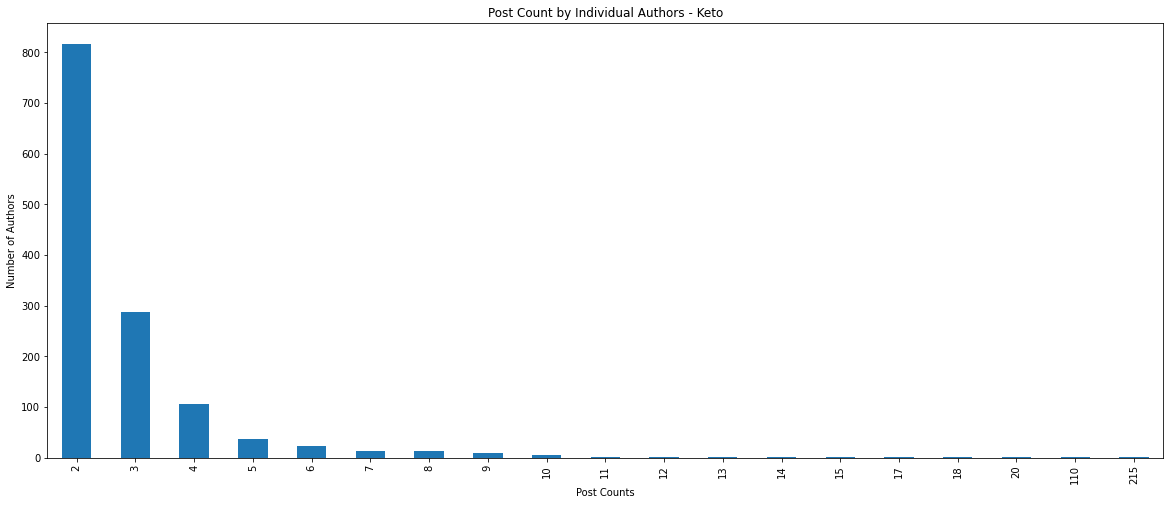

In [21]:
#plot visualisation for number of post by one author excluding one outlier with 5456 posts
keto.author.value_counts().value_counts().sort_index()[1:].plot(kind='bar', figsize=(20,8));
plt.title('Post Count by Individual Authors - Keto' )
plt.xlabel('Post Counts')
plt.ylabel('Number of Authors')
plt.savefig('../images/Post_Count_Individual_Author-Keto.png')
plt.show()


*Interpretation: Ommitting the deleted users during the data collection duration, there are very few post by individual authors. High post counts above 100 posts are by reddit moderators. Majority of the author posted twice on the subreddit*

In [22]:
#checking other author posts 
keto[keto.author == 'SenaBae'].head(2)

,author,link_flair_text,num_comments,subreddit_subscribers,subreddit,text,post_datetime
428,SenaBae,Help,9,2359105,keto,Could sweet magnesium tablets kick me out of k...,2021-04-09 11:17:24
3217,SenaBae,Food and Recipes,26,2311990,keto,Pissed at almond flour..As a broke student I b...,2021-02-20 23:39:49


Second runner up by keto-redditors are only at highest 20 counts between Feb- Apr. The post text mainly consist of help motivated on how to be more successful in keto dietary.

#### Vegan

In [23]:
vegan.author.value_counts().head()

[deleted]               315
veganactivismbot        127
DivineandDeadlyAngel     49
GoofyFoot76              48
AceAroPyschopath         46
Name: author, dtype: int64

In [24]:
vegan[vegan.author == 'veganactivismbot'].head()

,author,link_flair_text,num_comments,subreddit_subscribers,subreddit,text,post_datetime
35,veganactivismbot,Activism,2,590896,vegan,World Bank Urged To Stop Financing Ecuador’s L...,2021-04-17 20:43:56
38,veganactivismbot,Activism,2,590887,vegan,Help Pass The HEART Act Which Will Offer More ...,2021-04-17 20:23:04
195,veganactivismbot,Activism,5,590418,vegan,Does putting up vegan stickers around town act...,2021-04-16 18:05:35
199,veganactivismbot,Activism,2,590399,vegan,Act Now for 2 Cougars and a Bear Forced to Liv...,2021-04-16 17:43:28
205,veganactivismbot,Activism,2,590386,vegan,Yum!,2021-04-16 17:14:45


In [25]:
vegan.author.value_counts().value_counts().sort_index()

1      4595
2       732
3       237
4       109
5        52
6        27
7        37
8         9
9         9
10        6
11        7
12        5
13        4
14        4
15        1
16        1
17        1
19        1
20        2
21        2
25        1
29        1
33        1
35        1
36        2
46        1
48        1
49        1
127       1
315       1
Name: author, dtype: int64

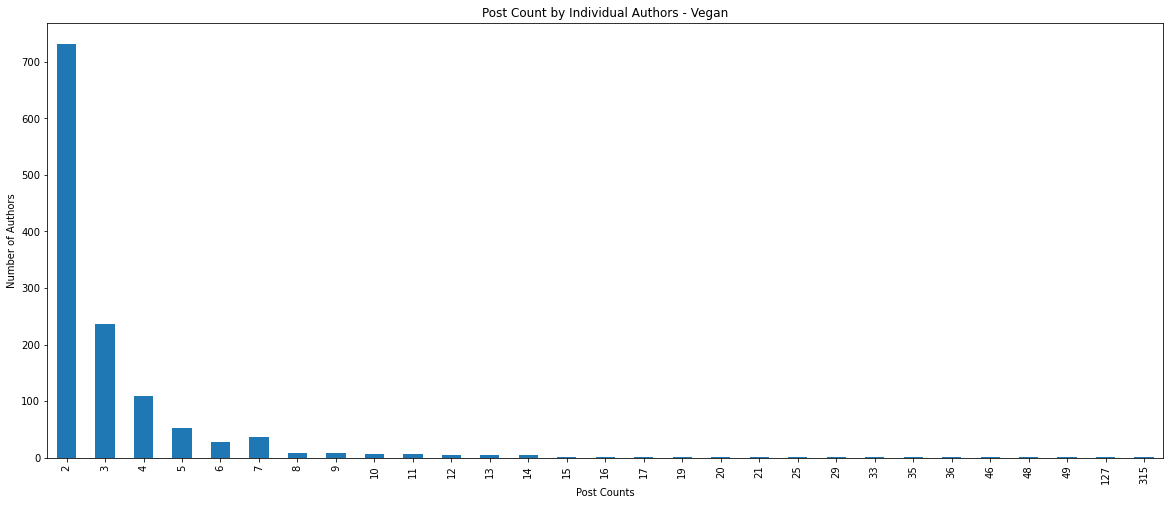

In [26]:
#plot visualisation for number of post by author excluding outlier at 4595
vegan.author.value_counts().value_counts().sort_index()[1:].plot(kind='bar', figsize=(20,8));
plt.title('Post Count by Individual Authors - Vegan' )
plt.xlabel('Post Counts')
plt.ylabel('Number of Authors')
plt.savefig('../images/Post_Count_Individual_Author-Vegan.png')
plt.show()

*Interpretation: High post counts above 100 posts are by vegan reddit moderators mostly activism driven. Majority of the author posted twice on the subreddit. However, compared to keto-redditer, there are more high post counts between 20 - 50 posts.*

In [27]:
#checking other author posts
vegan[vegan.author == 'DivineandDeadlyAngel'].head()

,author,link_flair_text,num_comments,subreddit_subscribers,subreddit,text,post_datetime
99,DivineandDeadlyAngel,Disturbing,262,590726,vegan,Whew...,2021-04-17 11:49:43
267,DivineandDeadlyAngel,Disturbing,217,590297,vegan,Imagine...,2021-04-16 12:27:49
516,DivineandDeadlyAngel,Educational,69,589711,vegan,Heads Up!,2021-04-15 00:55:10
634,DivineandDeadlyAngel,Disturbing,572,589477,vegan,Fuck Off..,2021-04-14 11:52:46
755,DivineandDeadlyAngel,Funny,2,587860,vegan,Reading Labels Be Like...,2021-04-09 15:13:39


Second runner up by vegan-redditors are only at 49 posts between Feb- Apr. The post are awareness motivated amongst the community. The sentiment on the posts appears to have strong message.

In [28]:
vegan.author.value_counts()[1:].describe()

count    5851.000000
mean        1.531020
std         2.576592
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       127.000000
Name: author, dtype: float64

### 3.2 Posting Date

In [29]:
#date timeline of the collected posts
vegan['date'] = vegan.post_datetime.dt.date
keto['date'] = keto.post_datetime.dt.date

In [30]:
print('Vegan Reddits Timeframe', vegan['date'].min(),'to',vegan['date'].max())

Vegan Reddits Timeframe 2021-02-09 to 2021-04-18


In [31]:
print('Keto Reddit Timeframe',keto['date'].min(),'to', keto['date'].max())

Keto Reddit Timeframe 2020-12-02 to 2021-04-18


The timeline between both post counts to ~10,000 post has a huge timeline difference showing a large post frequency in the vegan subreddit compared to keto-subreddit. 

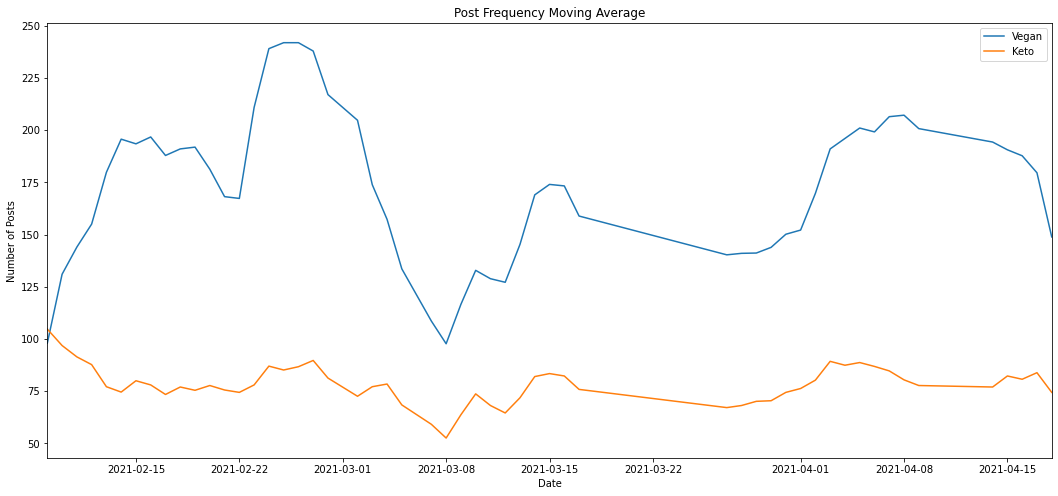

In [32]:
#df to cumulate the posting dates frequency counts for vegan
date_count_v = vegan.date.value_counts().sort_index().reset_index()
date_count_v.columns = ['date', 'post_count']
date_count_v['post_count'] = date_count_v['post_count'].rolling(7, 1).mean()

plt.figure(figsize=(18,8))
#line plot by rolling mean average
sns.lineplot(data=date_count_v, x='date', y='post_count', color='tab:blue',label='Vegan');

#df to cumulate the posting dates frequency counts for keto 
date_count_k = keto.date.value_counts().sort_index().reset_index()
date_count_k.columns = ['date', 'post_count']
date_count_k['post_count'] = date_count_k['post_count'].rolling(7, 1).mean()

sns.lineplot(data=date_count_k, x='date', y='post_count', color='tab:orange',label='Keto');
plt.title('Post Frequency Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
#limit keto post between feb to april for comparison with vegan dataset
plt.xlim(vegan['date'].min(), vegan['date'].max())
plt.savefig('../images/Post_Frequency_Moving_Average.png')

plt.show()

*Interpretation: Both Keto and Vegan post is adjusted between Feb and Apr appears to have higher number of posts for vegan compared to keto. The fluctuation also is higher for vegan-reddits as well. The abive has been adjusted to the moving average of 7 days.*

### 3.3 Posting Hour

In [33]:
#hour timeline of the collected posts
vegan['hour'] = vegan.post_datetime.dt.hour
keto['hour'] = keto.post_datetime.dt.hour

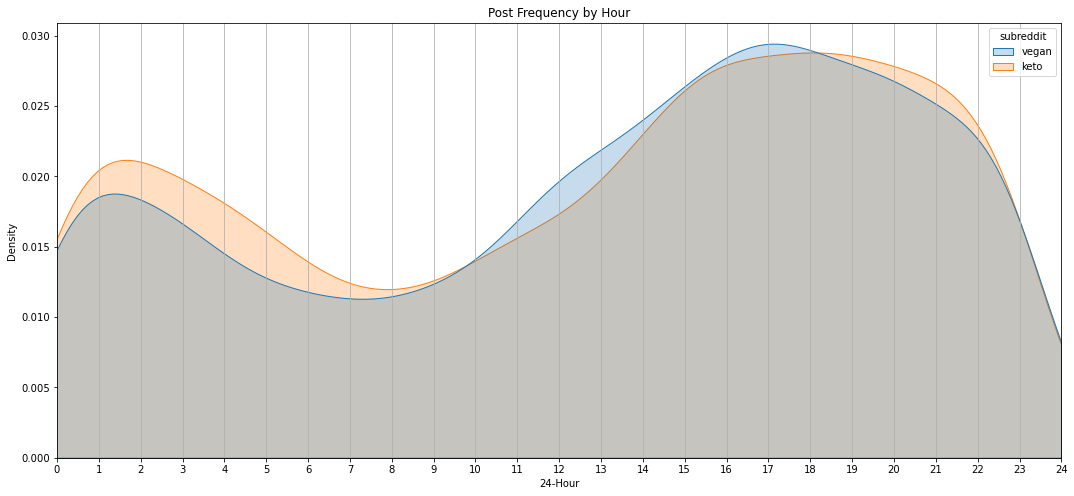

In [34]:
plt.figure(figsize=(18,8))
combined_df = pd.concat([vegan, keto])

sns.kdeplot(data=combined_df, x='hour', hue='subreddit', fill=True, clip=(0, 24),common_norm=True)
plt.xlim(0, 24)
plt.xticks(range(25))
plt.grid(axis='x')

plt.title('Post Frequency by Hour')
plt.xlabel('24-Hour')
plt.ylabel('Density')
plt.savefig('../images/Post_Frequency_by_Hour.png')

plt.show()

*Interpretation: Vegan and Keto postings are often peaking and dipping in a similar cycle, indicating a similar target market.*

### 3.4 Subscribers Growth and Number of Comments

In [35]:
combined_df.sample(3)

,author,link_flair_text,num_comments,subreddit_subscribers,subreddit,text,post_datetime,date,hour
5925,__cody_,Disturbing,0,572539,vegan,Is feeding dogs vegtables abuse or?,2021-02-25 13:31:03,2021-02-25,13
932,skulloflugosi,Uncategorised,1,587566,vegan,Plant-Based Food Sales Surge by 27 Percent to ...,2021-04-08 17:30:38,2021-04-08,17
4499,its_wimdy,Uncategorised,2,577229,vegan,"Sugar checkerHi, I'm looking to quit sugar and...",2021-03-10 14:30:23,2021-03-10,14


In [36]:
combined_df.groupby(by='subreddit').agg(['mean','sum'])[['num_comments','subreddit_subscribers']]

num_comments         subreddit_subscribers             
                  mean     sum                  mean          sum
subreddit                                                        
keto         12.072094  115373          2.276531e+06  21756810909
vegan        11.830583  109705          5.771821e+05   5352209428

In [37]:
rate_growth = combined_df.groupby(['subreddit', 'date']).max()['subreddit_subscribers'].reset_index()
keto_first, vegan_first = rate_growth.groupby('subreddit').first()['subreddit_subscribers'].values

rate_growth.loc[rate_growth.subreddit=='keto', 'subreddit_subscribers'] -= keto_first
rate_growth.loc[rate_growth.subreddit=='vegan', 'subreddit_subscribers'] -= vegan_first
rate_growth.head()

,subreddit,date,subreddit_subscribers
0,keto,2020-12-02,0
1,keto,2020-12-03,982
2,keto,2020-12-04,2729
3,keto,2020-12-05,3974
4,keto,2020-12-06,5327


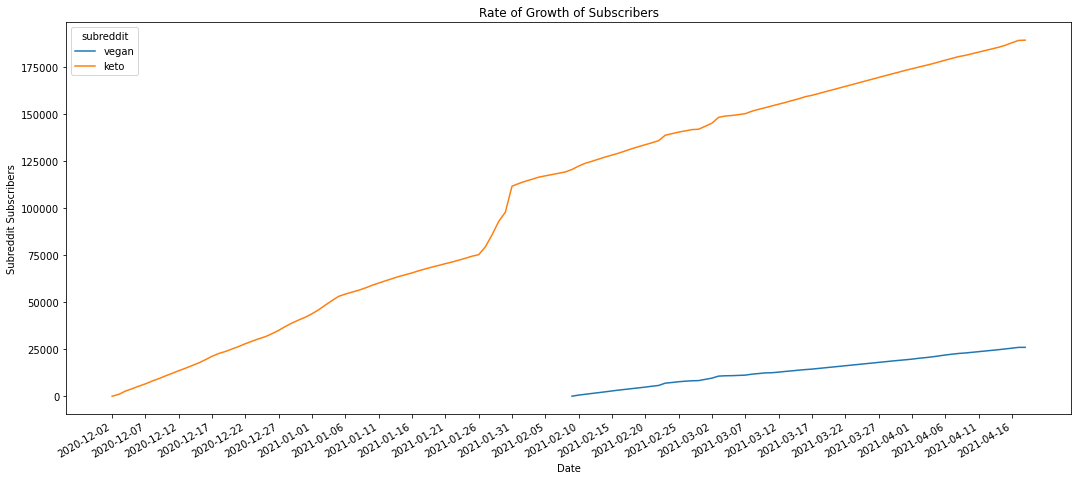

In [38]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(18,8))
ax = sns.lineplot(data=rate_growth, x='date', y='subreddit_subscribers', hue='subreddit', hue_order=['vegan', 'keto'])

ax.set_title('Rate of Growth of Subscribers')
ax.set_xlabel('Date')
ax.set_ylabel('Subreddit Subscribers')

# rotate and align the tick labels 
fig.autofmt_xdate()

# use a more precise date string for the x axis locations
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_xticks(pd.date_range(combined_df.date.min(), combined_df.date.max(), freq='5D'))
plt.savefig('../images/Rate_of_Growth_Subscribers.png')

plt.show()

*Interpetation: Subscribers rate of growth for keto-redditers are much steeper compared to vegan. Over the past few months, the subsription rate as increased showing popularity and interest for keto diet compared to vegan*

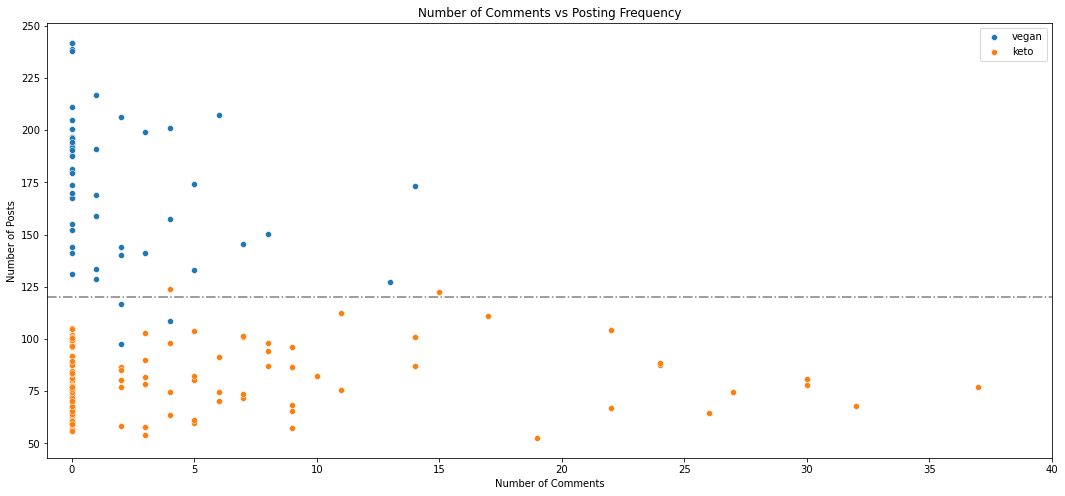

In [39]:
plt.figure(figsize=(18,8))

sns.scatterplot(data = vegan, x='num_comments', y=date_count_v['post_count'], color='tab:blue',label='vegan')
sns.scatterplot(data = keto, x='num_comments', y=date_count_k['post_count'], color='tab:orange',label='keto')

#limit 2 outlier data at 20 and 40 comments
plt.xlim(-1,40)

plt.title('Number of Comments vs Posting Frequency')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Posts')
plt.axhline(120, c='k', linestyle='-.', alpha=0.5)

plt.savefig('../images/Num_Comments_vs_Post_Frequency.png')

plt.show()

*Interpretation: The number of posts vs number of comments are in relation where vegan-redditers are more concentrated in awareness/sharing in few comments to no comments, whereas keto-redditters are responsive in comments and discussion ranging up above 15 comments.*

In [40]:
#day timeline of the collected posts
combined_df['day'] = combined_df.post_datetime.dt.day

In [41]:
combined_df.isnull().sum()

author                   0
link_flair_text          0
num_comments             0
subreddit_subscribers    0
subreddit                0
text                     0
post_datetime            0
date                     0
hour                     0
day                      0
dtype: int64

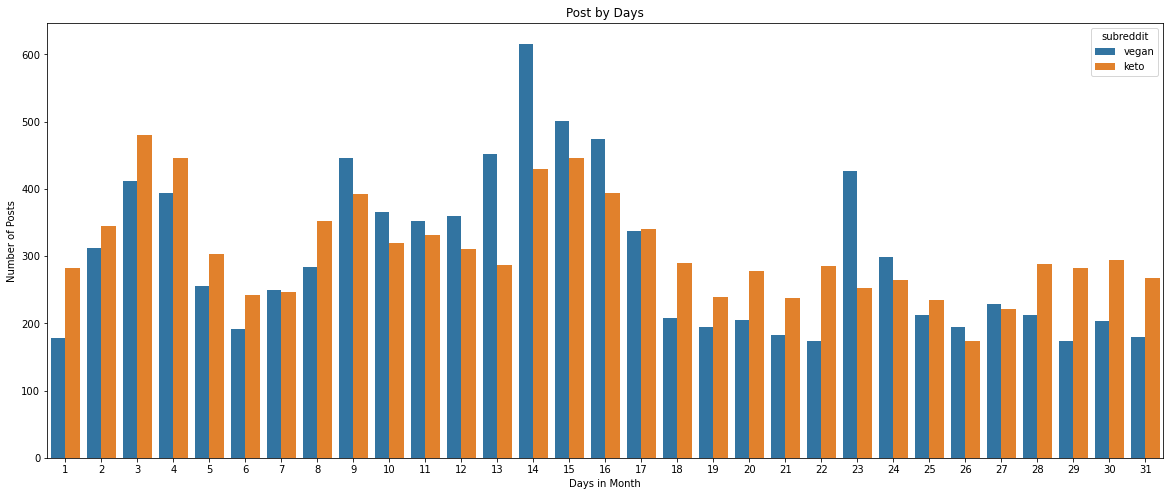

In [42]:
plt.figure(figsize=(20,8))
plot_df = combined_df.groupby(['day', 'subreddit']).count()['date'].reset_index()
sns.barplot(data=plot_df, x='day', y='date', hue='subreddit', hue_order=['vegan', 'keto'], )

plt.title('Post by Days')
plt.xlabel('Days in Month')
plt.ylabel('Number of Posts')
plt.savefig('../images/Post_by_Days.png')

plt.show()

*Interpretation: In visualising the monthly distribution of posts shows peak biweekly but does not show much relation to the post counts behavior.*

### 3.5 Word Counts 

In [43]:
combined_df = combined_df.reset_index(drop=True)

In [44]:
combined_df['text_word_count'] = [len(combined_df['text'][i].split()) for i in range(combined_df.shape[0])]

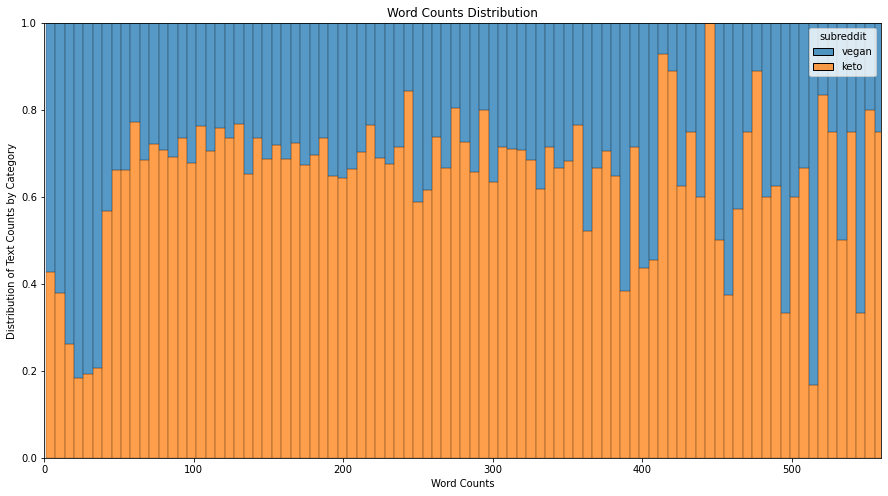

In [45]:
plt.figure(figsize=(15,8))
sns.histplot(data=combined_df,x='text_word_count',hue='subreddit', multiple='fill')

plt.title('Word Counts Distribution')
plt.xlabel('Word Counts')
plt.ylabel('Distribution of Text Counts by Category')
plt.xlim(0,560)
plt.savefig('../images/Word_Count_Distribution.png')
plt.show()

*Intepretation: In most posts by keto-reditters are wordy, mostly because of lengthy query over the recent popularized dietary. Most keto-redditers are seeking for help to design their keto diet.[(NPD News, 2018)](https://www.npd.com/wps/portal/npd/us/news/press-releases/2018/cookbook-category-sales-rose-21-percent-year-over-year-the-npd-group-says/)*

### 3.6 Flair Text / Tags

In [46]:
ct = pd.crosstab(index=combined_df['subreddit'],columns=combined_df['link_flair_text'])
ct

link_flair_text,AMA,Activism,Advice,Blog/Vlog,Book,Clothing &amp; Shoes,Cosmetics,Creative,Discussion,Disturbing,Educational,Environment,Food,Food and Recipes,Funny,Health,Help,Infographic,Medical,Meta,Misleading,NSFW,News,Other,Question,Rant,Relationships,Repost,Science and Media,Small Victories,Story,Success Story,Tips and Tricks,Uncategorised,Uplifting,Video,WRONG,Wildlife
subreddit,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
keto,5,0,0,0,0,0,0,0,0,0,0,0,0,489,0,0,1856,0,175,0,0,34,0,389,0,0,0,0,66,0,0,415,283,5845,0,0,0,0
vegan,0,273,201,33,16,43,17,49,409,254,94,63,1148,0,282,236,0,19,0,41,19,0,118,0,587,226,38,25,0,81,63,0,0,4479,232,154,34,39


*Interpretation: The cross-tab above shows the high counts for **help** taggings on keto-reddit, whereas high counts on **food** tagging by vegan-reddit. Nonetheless, both keto and vegan reddits has a common topic on food, which could lead to misclassification by the model in the prediction stage.*

In [47]:
vegan.groupby('link_flair_text').agg('nunique')['author'].sort_values(ascending=False)

link_flair_text
Uncategorised           3125
Food                     860
Question                 525
Discussion               330
Funny                    221
Health                   210
Uplifting                198
Disturbing               191
Advice                   188
Rant                     162
Activism                 120
Video                    102
News                      83
Educational               78
Small Victories           74
Environment               59
Story                     58
Creative                  43
Clothing &amp; Shoes      43
Wildlife                  37
Relationships             36
Meta                      34
WRONG                     33
Blog/Vlog                 24
Repost                    20
Cosmetics                 17
Misleading                16
Infographic               14
Book                      13
Name: author, dtype: int64

In [48]:
keto.groupby('link_flair_text').agg('nunique')['author'].sort_values(ascending=False)

link_flair_text
Uncategorised        4465
Help                 1488
Food and Recipes      418
Success Story         367
Other                 313
Tips and Tricks       248
Medical               159
Science and Media      52
NSFW                   28
AMA                     5
Name: author, dtype: int64

In [49]:
#review text on vegan
combined_df[combined_df.link_flair_text == "Food"][['text']].head()

,text
5,I highly recommend making homemade tempeh if y...
6,YardHouse- very vegan friendly chain restauran...
9,Small steps
10,good greek yoghurt alternative?
14,Vegan mac &amp; trees 🌱 (ft kitty foot in back...


In [50]:
#review text on keto
combined_df[combined_df.link_flair_text == "Food and Recipes"][['text']].head()

,text
9282,"🎂Chocolate, Cake and Turning 40 🎂"
9283,New keto products at Costco (some may be old b...
9306,Has anyone tried these brands of Monk Fruit?We...
9317,Black Soybeans - Change in nutrition labelBlac...
9365,Suggestions please!!I'm 3 weeks into keto and ...


In [51]:
#review on uncategorised post
combined_df[combined_df.link_flair_text == "Uncategorised"][['text','subreddit']].sample(20)

,text,subreddit
6955,Very tasty lunch!,vegan
7787,What to say when carnists say: “i could give u...,vegan
14355,Looking for a bomb milk chocolate bar recipeHe...,keto
14351,Help starting Keto,keto
18334,Could anyone help me with a simple meal plan?I...,keto
11438,The best recipe for you!,keto
17580,Gainig weight on a keto dietHi I´m a total beg...,keto
2900,What were people’s reactions when you went vegan?,vegan
4966,"I know it's not a real skull, but come on! Dis...",vegan
13941,9 months resultsI started last April. I am 5'5...,keto


*Interpretation: The general uncategorised post are a huge factor that could affect the current classification of the text category. In brief, there are post that could be categorised in the existing flair tags.*

## 4.0 Preliminary Review

In [52]:
combined_df.head()

,author,link_flair_text,num_comments,subreddit_subscribers,subreddit,text,post_datetime,date,hour,day,text_word_count
0,Elise_93,Funny,0,590954,vegan,A summary of carnist logic about PETA:,2021-04-18 02:03:10,2021-04-18,2,18,7
1,SeviathanVonEldritch,Rant,0,590952,vegan,Underestimated it as well...,2021-04-18 01:57:56,2021-04-18,1,18,4
2,quidiuris,Uncategorised,0,590952,vegan,Hair conditioner bars - any recommendations?,2021-04-18 01:55:05,2021-04-18,1,18,6
3,lunanabiki,Uncategorised,0,590953,vegan,nonvegan logic that surprises me (that i haven...,2021-04-18 01:51:11,2021-04-18,1,18,12
4,pastelprincess1,Uncategorised,0,590953,vegan,Sustainable + Ethical Alternatives Directory,2021-04-18 01:50:06,2021-04-18,1,18,5


From the exploratory data anaylsis, the larger text distributed data from keto-redditers may be affect the clasification model if text and queries are food and recipe related. Most vegan-redditers have a large portion of topics relevant to food and recipes too. A huge portion of uncategorised datasets remains to be investigated in the model after preprocessing to evaluate if these information are distinctive or otherwise. 

However, with the different motivation observed from active authors, we may be able to see a pattern in the different community. 

If the classification could achive above 85% classification accuracy, the misclassification text would be an interesting set to explore. If there were common words between keto and vegan reddits, there may be possible exploratory reasons for marketing to venture into keto-vegan diet. 

## Export Combined Dataset

In [53]:
combined_df.to_csv('../data/combined_df',index=False)